In [0]:
import warnings
warnings.filterwarnings('ignore')

!pip install -q keras

import os
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.utils import shuffle
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from pylab import rcParams

### 上傳 `pkgo_norm.csv` 上傳到 colab

In [0]:
if not os.path.exists('pkgo_nyc_5class.csv.bz2'):
    uploaded = files.upload()

### 讀取 `pkgo_norm.csv`

In [0]:
pkgo = pd.read_csv('pkgo_nyc_5class.csv.bz2')

### 建構模型

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping

def build_model(X, drp_rate):
    model = Sequential()
    model.add(Dense(512, input_dim=X.shape[-1]))
    model.add(Activation('relu'))
    # 設定 dropout rate
    model.add(Dropout(drp_rate))
    model.add(Dense(512))
    model.add(Activation('relu'))   
    # 設定 dropout rate
    model.add(Dropout(drp_rate))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    return model

In [0]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    X = pkgo.iloc[:, :num_cols-1]
    y = pkgo['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = to_categorical(y)
    
    # 打亂資料集
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

## 比較不同 Dropout rate 的結果

In [27]:
dropout_rates = [0, 0.1, 0.2, 0.4, 0.6, 0.8]

train_loss_list = []
train_acc_list = []
valid_loss_list = []
valid_acc_list = []

for drp_rate in dropout_rates:
    model = build_model(X, drp_rate)
    optim = Adam(lr=10e-5)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optim,
                  metrics=['accuracy'])
    batch_size=32
    epochs = 150
    n_patience = 15
    early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = n_patience, 
                               verbose = 1)

    print('Training a model with dropout rate: {}'.format(drp_rate))
    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1, callbacks=[early_stopping])
    loss = history.history.get('loss')
    acc = history.history.get('acc')
    val_loss = history.history.get('val_loss')
    val_acc = history.history.get('val_acc')
    
    train_loss_list.append(loss)
    train_acc_list.append(acc)
    valid_loss_list.append(val_loss)
    valid_acc_list.append(val_acc)

Training a model with dropout rate: 0
Epoch 00056: early stopping
Training a model with dropout rate: 0.1
Epoch 00050: early stopping
Training a model with dropout rate: 0.2
Epoch 00077: early stopping
Training a model with dropout rate: 0.4
Epoch 00021: early stopping
Training a model with dropout rate: 0.6
Epoch 00026: early stopping
Training a model with dropout rate: 0.8
Epoch 00016: early stopping


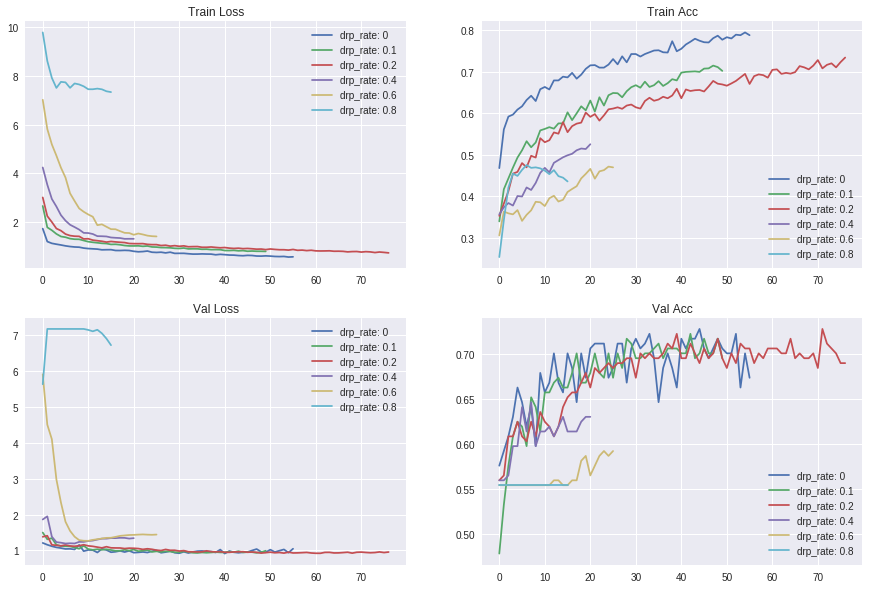

In [28]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 15, 10
    
plt.figure(0)

# Training Loss
plt.subplot(221)
for k in range(len(dropout_rates)):
    plot_label = 'drp_rate: {}'.format(dropout_rates[k])
    loss = train_loss_list[k]
    plt.plot(range(len(loss)), loss, label=plot_label)
    plt.legend(loc='best')
    plt.title('Train Loss')

# Training Accuracy
plt.subplot(222)
for k in range(len(dropout_rates)):
    plot_label = 'drp_rate: {}'.format(dropout_rates[k])
    acc = train_acc_list[k]
    plt.plot(range(len(acc)), acc, label=plot_label)
    plt.legend(loc='best')
    plt.title('Train Acc')

# Validation Loss
plt.subplot(223)
for k in range(len(dropout_rates)):
    plot_label = 'drp_rate: {}'.format(dropout_rates[k])
    val_loss = valid_loss_list[k]
    plt.plot(range(len(val_loss)), val_loss, label=plot_label)
    plt.legend(loc='best')
    plt.title('Val Loss')

# Validation Accuracy
plt.subplot(224)
for k in range(len(dropout_rates)):
    plot_label = 'drp_rate: {}'.format(dropout_rates[k])
    val_acc = valid_acc_list[k]
    plt.plot(range(len(val_acc)), val_acc, label=plot_label)
    plt.legend(loc='best')
    plt.title('Val Acc')
    
plt.show()